# AI-Based Garbage Classification using CNN and Transfer Learning
---------------
Developer : [Saaiem Salaar](https://www.linkedin.com/in/salaarsaaiem525/)

### <span style="color:red">**1 - Installing Necessary Libraries** </span><br>
* **`TensorFlow`** – for building, training, and deploying deep learning models  
* **`NumPy`** – for numerical operations and array handling  
* **`Matplotlib`** – for plotting training metrics and visualizing results  
* **`OpenCV`** – for advanced image loading, processing, and manipulation  
* **`Python`** – core language for scripting and running the entire project  
* **`Scikit-learn`** – for evaluation metrics like classification report and confusion matrix


In [3]:
!pip install tensorflow numpy matplotlib opencv-python scikit-learn gradio

You should consider upgrading via the 'C:\Users\aar5ess\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


----
### <span style="color:red">**2 - Loading the Dataset**  </span><br>
The Dataset i have used is from Kaggle.com  
> [**Garbage Image Dataset**](https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset) by Farzad Nekouei


In [6]:
#Loading Dataset
dataset_dir= r"D:\Downloads\SAM\Edunet Internship\Dataset"
import os
print(os.listdir("D:\Downloads\SAM\Edunet Internship\Dataset"))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


---

### <span style="color:red">**3 - Importing Libraries**</span><br>

This section includes all essential libraries required for data preprocessing, visualization, model building, evaluation, and deployment.

1. **`os`** – for handling file paths, directories, and system-level operations  
2. **`numpy`** – for efficient numerical operations and array manipulations  
3. **`matplotlib.pyplot`** – for plotting graphs and visualizing training metrics  
4. **`seaborn`** – for enhanced statistical data visualizations (heatmaps, etc.)  
5. **`tensorflow`** – for building and training machine learning models  
6. **`keras`** – high-level API in TensorFlow used to simplify model architecture  
7. **`Sequential`** – to build models layer-by-layer in Keras  
8. **`layers`** – contains essential building blocks like Rescaling, Pooling, Dense, etc.  
9. **`optimizers` and `callbacks`** – for tuning model performance and training control  
10. **`Layer`** – for creating custom layers (if needed)  
11. **`EfficientNetV2B2`** – a pretrained model used for transfer learning  
12. **`compute_class_weight`** – handles class imbalance by computing weights  
13. **`confusion_matrix`, `classification_report`** – for model evaluation and diagnostics  
14. **`gradio`** – to build an interactive web interface for your trained model  

> ✅ These imports ensure that the project is fully equipped for preprocessing, training, evaluation, visualization, and deployment.


In [20]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

---

### <span style="color:red">**4 - Preprocessing and Loading Data**</span><br>

- This program loads the dataset from a directory and automatically splits it into **training (80%)** and **validation (20%)** subsets using `image_dataset_from_directory`.
- The images are resized to **128×128** pixels and loaded in **batches of 32** for optimized memory and training performance.
- The validation dataset is further divided into two equal parts to create a **validation set** and a **test set**.
- Real-time performance optimization is applied to the test dataset using `cache()` and `prefetch()`.

#### **Libraries Used:** <br>
1. `tensorflow.keras.utils` : for loading and splitting datasets  
2. `tf.data` : for dataset cardinality, caching, and prefetching  

#### **Key Functions & Parameters:**  
1. `image_dataset_from_directory()` : loads image data with preprocessing and optional splitting  
2. `validation_split` : splits the dataset into training and validation subsets  
3. `subset="training"/"validation"` : indicates which split to load  
4. `image_size=(128, 128)` : resizes all images to the given size  
5. `batch_size=32` : defines how many images to load per batch  
6. `cardinality()` : gets number of batches to enable custom splitting  
7. `take()` / `skip()` : used to split validation dataset into validation and test sets  
8. `cache()` / `prefetch()` : boosts performance by preparing data ahead of time  


In [13]:
image_size = (128, 128)
batch_size = 32
seed = 42

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

# Get class names from validation dataset
val_class = val_ds.class_names

# Split validation into test and validation sets
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_dat = val_ds.skip(val_batches // 2)

# Optimize test dataset
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE)

# Print class names and count
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


---

### <span style="color:red">**5 - Visualizing the Dataset**</span><br>

This program displays a 4×3 grid of **12 sample images** from the training dataset to visually verify correct preprocessing and labeling. It also includes better layout control and class labeling.

- **Libraries Used:** <br>
1. `matplotlib.pyplot` : for plotting and displaying images  
2. `numpy` : for converting tensors to NumPy arrays  

- **Functions Used:**  
1. `plt.figure()` : sets the overall figure size  
2. `plt.subplot()` : creates a subplot grid (4 rows × 3 columns)  
3. `plt.imshow()` : renders each image  
4. `plt.title()` : adds the corresponding class name and index as a title  
5. `plt.axis("off")` : hides axis ticks for clarity  
6. `plt.suptitle()` : adds an overall title to the figure  
7. `plt.tight_layout()` : optimizes spacing between subplots  
8. `plt.show()` : displays the final figure on screen


C:\Users\aar5ess\AppData\Local\Temp\ipykernel_8848\4135895634.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[5, 0, 1, 0.95])  # adjust to make space for title


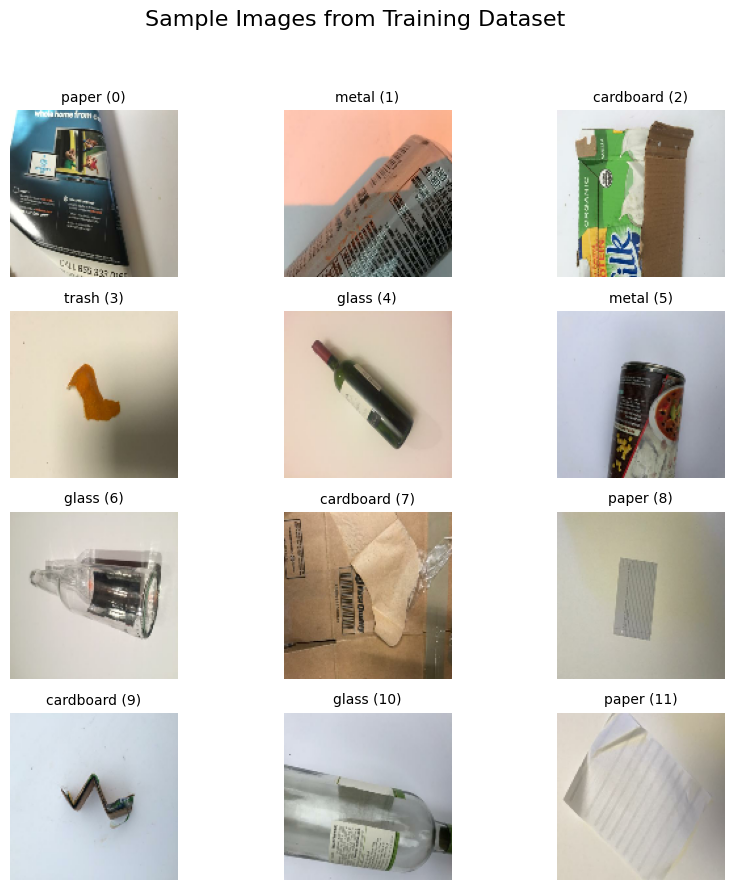

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    num_images = min(len(images), 12)
    for i in range(num_images):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"{train_ds.class_names[labels[i]]} ({i})", fontsize=10)
        plt.axis("off")

plt.suptitle("Sample Images from Training Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust to make space for title
plt.show()


---

### <span style="color:red">**6 - Enhanced Class Distribution Visualization**</span><br>

This program computes and displays the class-wise image distribution across the training, validation, and test datasets. It ensures the dataset is balanced enough for fair model training and evaluation.

- **Purpose:**  
  To calculate the percentage distribution of images per class and visualize the results to detect any imbalance that may affect model performance.

- **Steps Performed:**  
  1. `count_distribution()` function iterates through each dataset to count label occurrences and convert them into percentages.  
  2. `pandas.DataFrame` is used to display the class-wise percentages in a clean, tabular format.  
  3. `simple_bar_plot()` function uses `matplotlib` to visually represent the distribution for each dataset.  
  4. An `overall_dist` is computed by averaging training and validation distributions for a broader perspective.

- **Libraries Used:**  
  1. `pandas` – for formatting the output as a readable table  
  2. `matplotlib.pyplot` – for creating bar plots  
  3. `tensorflow` – for handling the image datasets  

- **Functions Used:**  
  - `count_distribution()` – counts and converts class occurrence to percentages  
  - `simple_bar_plot()` – creates bar charts with consistent styling  
  - `pd.DataFrame()` – organizes distribution data for display  
  - `to_string()` – prints the DataFrame cleanly without index  

> ✅ This step ensures your dataset is not only numerically balanced but also visually interpretable, helping you spot any class bias before training begins.



Class Distribution Summary:

    Class  Train (%)  Validation (%)  Test (%)  Overall (%)
cardboard      16.52           13.66     13.28        15.09
    glass      19.73           20.20     20.70        19.96
    metal      15.92           17.43     16.80        16.68
    paper      23.29           24.36     22.27        23.82
  plastic      19.44           17.62     19.92        18.53
    trash       5.09            6.73      7.03         5.91


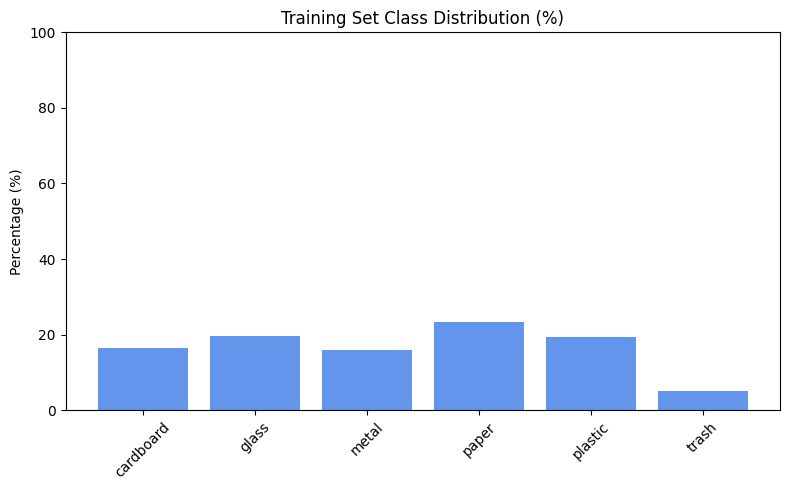

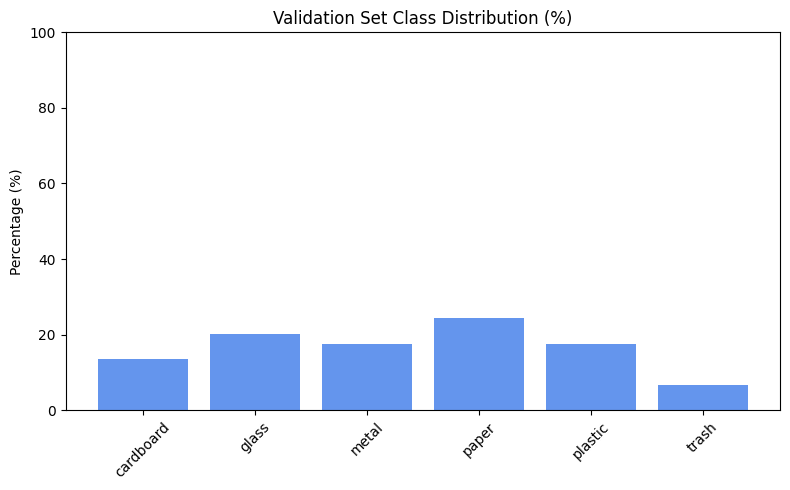

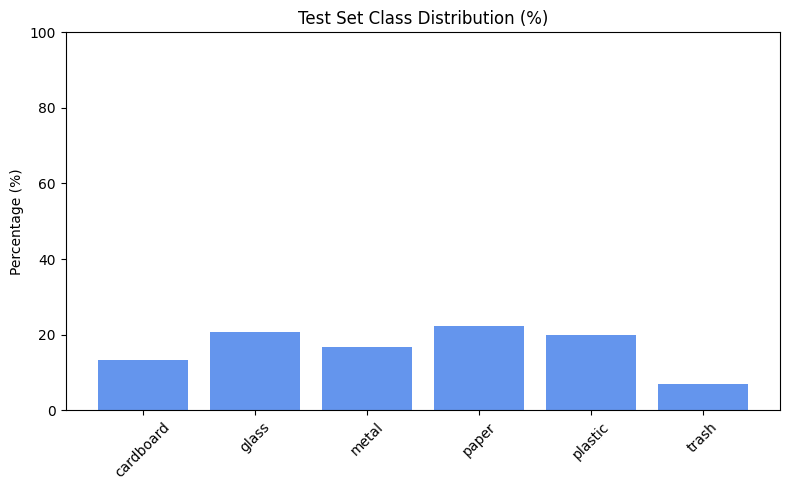

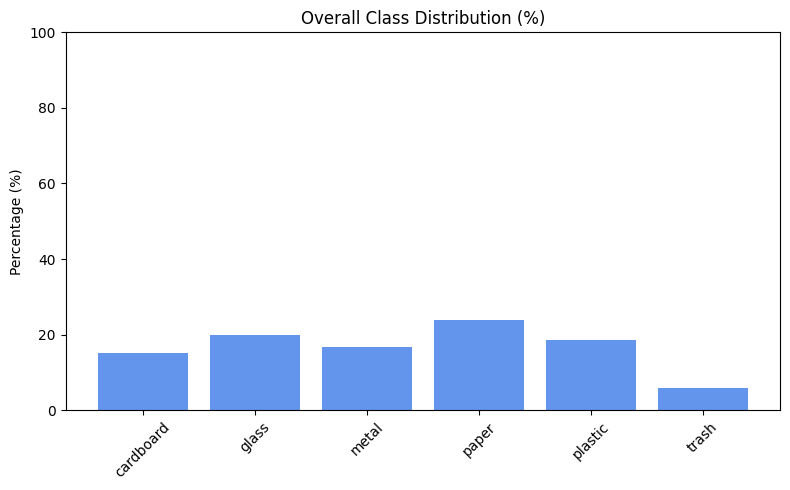

In [23]:
import pandas as pd  # Add this if not already imported

# Function to count class distribution (in %)
def count_distribution(dataset, class_names):
    total = 0
    counts = {name: 0 for name in class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            counts[class_names[label]] += 1
            total += 1

    return {k: round((v / total) * 100, 2) for k, v in counts.items()}

# Function to plot class distribution as bar graph
def simple_bar_plot(dist, title):
    plt.figure(figsize=(8, 5))
    plt.bar(dist.keys(), dist.values(), color='cornflowerblue')
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# Get class names
class_names = train_ds.class_names

# Compute distributions
train_dist = count_distribution(train_ds, class_names)
val_dist = count_distribution(val_ds, class_names)
test_dist = count_distribution(test_ds, class_names)
overall_dist = {k: round((train_dist[k] + val_dist[k]) / 2, 2) for k in class_names}

# Combine all distributions into a DataFrame for pretty display
dist_df = pd.DataFrame({
    'Class': class_names,
    'Train (%)': [train_dist[k] for k in class_names],
    'Validation (%)': [val_dist[k] for k in class_names],
    'Test (%)': [test_dist[k] for k in class_names],
    'Overall (%)': [overall_dist[k] for k in class_names],
})

# Print distributions as a clean table
print("\nClass Distribution Summary:\n")
print(dist_df.to_string(index=False))

# Plot distributions
simple_bar_plot(train_dist, "Training Set Class Distribution (%)")
simple_bar_plot(val_dist, "Validation Set Class Distribution (%)")
simple_bar_plot(test_dist, "Test Set Class Distribution (%)")
simple_bar_plot(overall_dist, "Overall Class Distribution (%)")
